In [128]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [152]:
df = pd.read_csv("data/dataset_1_regions_merged.csv", index_col=0)

In [153]:
df

,region,unemployed,infections,deaths,healed,population,procent_unemployed,procent_infections,procent_healed,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,Адыгея,17898,5828.0,49.0,4557.0,463088.0,0.038649,0.012585,0.009840,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,Алтай,15186,7296.0,24.0,6207.0,220181.0,0.068971,0.033136,0.028190,0.000109,9.430103,46.457233,2.267008,1.007107,24.1,4.2,42.00,10.8,64.1
2,Алтайский край,47654,18628.0,384.0,17392.0,2317153.0,0.020566,0.008039,0.007506,0.000166,24.568772,85.212759,3.559505,1.304013,17.5,2.6,41.37,14.5,71.7
3,Амурская,25986,7313.0,65.0,6864.0,790044.0,0.032892,0.009256,0.008688,0.000082,44.579305,136.036727,4.147556,1.547283,15.8,2.6,44.35,15.8,58.9
4,Архангельская,22140,21299.0,262.0,13985.0,1092424.0,0.020267,0.019497,0.012802,0.000240,49.566421,165.969440,4.990174,1.563425,12.7,1.4,40.57,12.8,67.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Хакасия,17068,7700.0,83.0,6276.0,534262.0,0.031947,0.014412,0.011747,0.000155,30.409276,84.013087,3.704567,1.236817,19.0,2.3,43.94,-5.8,72.9
79,Челябинская,106538,18836.0,186.0,14198.0,3466369.0,0.030735,0.005434,0.004096,0.000054,48.190734,134.758013,5.352160,1.522448,12.9,1.3,49.70,11.0,70.8
80,Чувашия,42008,9447.0,190.0,7616.0,1217818.0,0.034494,0.007757,0.006254,0.000156,32.787488,114.768381,5.740644,1.236814,17.4,2.0,40.01,14.0,70.3
81,Ямало-Ненецкий АО,8938,19261.0,128.0,14760.0,544444.0,0.016417,0.035377,0.027110,0.000235,96.955707,283.547987,3.360957,3.113967,5.7,0.8,80.20,17.0,51.4


In [154]:
df.columns

Index(['region', 'unemployed', 'infections', 'deaths', 'healed', 'population',
       'procent_unemployed', 'procent_infections', 'procent_healed',
       'procent_deaths', 'fin_blago', 'depo_mean', 'depo_salary', 'income_fix',
       'poverty_proc', 'ex_poverty_proc', 'social_exp', 'growth_social_exp',
       'soc_in_total_exp'],
      dtype='object')

In [155]:
df["depo_mean"] = df["depo_mean"] ** (-1)
df["depo_salary"] = df["depo_salary"] ** (-1)

In [156]:
# df = df[df.region!="Москва"]

<AxesSubplot:>

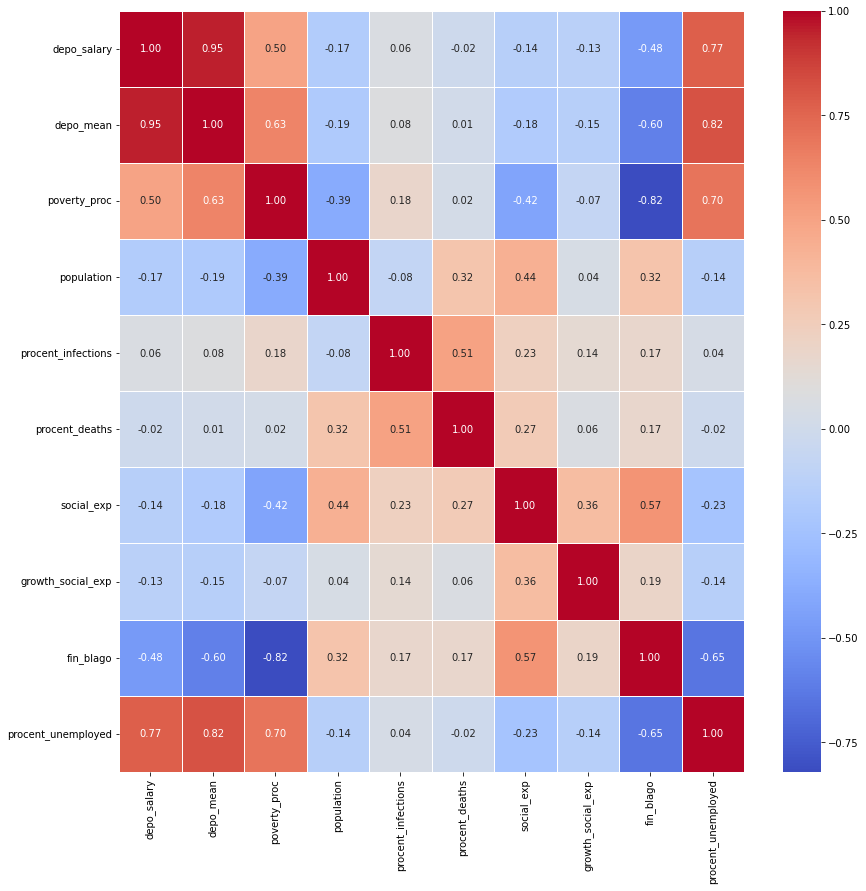

In [172]:
import matplotlib.pyplot as plt
columns_for_x = ["depo_salary",  "depo_mean",
                 'poverty_proc',
                 "population",
                 'procent_infections', 'procent_deaths',
                  'social_exp', 'growth_social_exp', "fin_blago"]

plt.figure(figsize=(14, 14))
corr = df[columns_for_x + ["procent_unemployed"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [173]:
columns_for_x.remove("depo_mean")

In [174]:
df['const'] = 1

In [175]:
from copy import copy
dependent_variable = 'procent_unemployed'
# independent_variables = [ 'depo_salary_19', 'depo_mean_19',  'growth_depo_19', 'procent_infected', 'procent_death',  'curr_depo_perc_19']
independent_variables = copy(columns_for_x)

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X - матрица признаков
X = df[independent_variables]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,depo_salary,3.980278
1,poverty_proc,8.902572
2,population,3.064258
3,procent_infections,6.680471
4,procent_deaths,4.965220
5,social_exp,27.589410
6,growth_social_exp,5.396614
7,fin_blago,12.695219


In [177]:
model = sm.OLS(df[dependent_variable], df[independent_variables + ['const']])
results = model.fit(cov_type='HC0')

In [178]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     procent_unemployed   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     92.61
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           5.30e-34
Time:                        18:58:24   Log-Likelihood:                 278.40
No. Observations:                  83   AIC:                            -538.8
Df Residuals:                      74   BIC:                            -517.0
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
depo_salary            0.0443      0

c:\users\iltya\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  warnings.warn('covariance of constraints does not have full '


In [186]:
independent_variables

['depo_salary',
 'poverty_proc',
 'population',
 'procent_infections',
 'procent_deaths',
 'social_exp',
 'growth_social_exp',
 'fin_blago']

In [179]:
dict_coefs = {i:[] for i in independent_variables + ["const"]}
all_results = []

for i in range(len(independent_variables)+1):
    print("ok")
    cur_undepenent = independent_variables[:i] + ["const"]
    model = sm.OLS(df[dependent_variable], df[cur_undepenent])
    results = model.fit(cov_type='HC0')
    all_results.append(results)
    # coefs = results.params.to_dict()
    # for i in independent_variables + ["const"]:
    #     dict_coefs[i].append(coefs.get(i, None))

ok
ok
ok
ok
ok
ok
ok
ok
ok


In [183]:
from statsmodels.iolib.summary2 import summary_col

results_table = summary_col(all_results, model_names=[f'Model {i}' for i in range(len(all_results))], stars=True)

In [184]:
print(results_table)



                    Model 0   Model 1   Model 2   Model 3   Model 4   Model 5   Model 6   Model 7   Model 8 
------------------------------------------------------------------------------------------------------------
R-squared          0.0000    0.5976    0.7252    0.7411    0.7464    0.7474    0.7474    0.7488    0.7503   
R-squared Adj.     0.0000    0.5927    0.7183    0.7313    0.7334    0.7310    0.7275    0.7254    0.7233   
const              0.0318*** 0.0143*** -0.0006   -0.0054   -0.0039   -0.0039   -0.0046   -0.0045   0.0007   
                   (0.0019)  (0.0016)  (0.0031)  (0.0037)  (0.0041)  (0.0040)  (0.0055)  (0.0053)  (0.0087) 
depo_salary                  0.0632*** 0.0463*** 0.0459*** 0.0457*** 0.0456*** 0.0456*** 0.0450*** 0.0443***
                             (0.0060)  (0.0030)  (0.0030)  (0.0032)  (0.0031)  (0.0031)  (0.0030)  (0.0032) 
fin_blago                                                                                          -0.0001  
                  

In [17]:
print(results)

In [18]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print('P-value:', p_value)

# нулева ягипотеза отвергается -> в данных гетероскедастичность

P-value: 0.23793156406347035


## дальше не смотреть

In [19]:
all_results = []
control_variables = ["procent_infected"]

for independent_var in independent_variables:
    model = sm.OLS(df[dependent_variable], df[[independent_var] + ['const'] + control_variables])

    results = model.fit(cov_type='HC0')
    all_results.append(results)

KeyError: "['procent_infected'] not in index"